# Advanced search and query

<div>
    <img style='width: 220px;height: 100px;float: left;' src="./Supplementary_data/EODC-Logo-Final.png" height='100px' width='220px'/>
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='100px' width='200px'/> 
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/bmlv.svg" height='100px' width='200px'/>
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/LOGO_TUW_GEO.png" height='100px' width='200px'/>
    <img style='width: 100px;height: 100px;float: left;' src="./Supplementary_data/Boku-wien.svg" height='100px' width='100px'/>
    <img style='width: 150px;height: 100px;float: right;' src="./Supplementary_data/ADC_Logo_final_transparent.png" height='100px' width='150px'/>
</div>

This notebok shows how to explore a product in more detail including its metadata, measurements and metadata of datasets. It also shows how to query for measurements of products. 

**When accessing metadata of a certain product it is possible to discover whether that product has any data in the given spatial and temporal bounds.**

## Exploring products and metadata

First the enviroment is loaded and initialized.

In [1]:
import datacube
%matplotlib inline
dc = datacube.Datacube(app='sample_2')

To list the products `list_products()` is called. It is possible to list only certain columns and rows. To see the product columns we call the `columns` attribute

In [2]:
prodlist = dc.list_products()
prodlist.columns

Index(['name', 'description', 'product_type', 'lon', 'time',
       'measurement_mode', 'lat', 'format', 'resolution_class',
       'quality_check_flag', 'platform', 'granule_id', 'platform_number',
       'orbit_direction', 'cloud_cover_percentage', 'instrument',
       'creation_time', 'relative_orbit_number', 'label', 'crs', 'resolution',
       'tile_size', 'spatial_dimensions'],
      dtype='object')

Below we list only the name, description and platform, for products captured by the Sentinel-1 platform.

In [3]:
display_columns = ['name', 'description', 'platform']
prodlist[prodlist['platform'] == 'Sentinel-1'][display_columns].dropna()

name                                        description  \
id                                                                           
13       GMR_Sentinel_1  Backscatter from a unit ground area projected ...   
14   MMENGMR_Sentinel_1                               Monthly mean of GMR.   
15  MMENSIG0_Sentinel_1                              Monthly mean of SIG0.   
16  SCOMP003_Sentinel_1  Spring composite (VV of March (R), VH of April...   
17  SCOMP004_Sentinel_1  Summer composite (VV of June (R), VH of July (...   
18  SCOMP005_Sentinel_1  Autumn composite (VV of September (R), VH of O...   
19  SCOMP006_Sentinel_1  Winter composite (VV of December (R), VH of Ja...   
20  SCOMP007_Sentinel_1  VH summer composite (VH of June (R), VH of Jul...   
21      SIG0_Sentinel_1  Backscatter returned to the satellites antenna...   
22  SSMNOISE_Sentinel_1  Noise of the relative surface soil moisture es...   
23       SSM_Sentinel_1                    Relative surface soil moisture.   

      platform  
id              
13  Sentinel-1  
14  Sentinel-1  
15  Sentinel-1  
16  Sentinel-1  
17  Sentinel-1  
18  Sentinel-1  
19  Sentinel-1  
20  Sentinel-1  
21  Sentinel-1  
22  Sentinel-1  
23  Sentinel-1

To list the measurements (bands/polarisations) from a specific product we can use `pandas.DataFrame.loc` method. The method `get_level_values` fetches the index values from the measurements DataFrame. In the case of the measurements the 0 index refers to the product column and the 1 index refers to the measurement colum. We can see some metadata including the data type, nodata value and units of the measured value. Each dataset in the `MMENSIG0_Sentinel_1` product contains two measurements, the VV polarization and the VH polarization.

In [4]:
measlist = dc.list_measurements()
measlist.loc[measlist.index.get_level_values(0) == 'MMENSIG0_Sentinel_1']

aliases  dtype  \
product             measurement                                                 
MMENSIG0_Sentinel_1 VV           [band_1, band_01, B01, Band1, Band_1]  int16   
                    VH           [band_2, band_02, B02, Band2, Band_2]  int16   

                                name  nodata units  
product             measurement                     
MMENSIG0_Sentinel_1 VV            VV   -9999    dB  
                    VH            VH   -9999    dB

In [5]:
query = {
    'lat': (48.15, 48.35),
    'lon': (16.3, 16.5),
    'time': ('2017-04-01', '2017-10-31')
}

To display available datasets along with metadata we can use the `find_datasets_lazy` method and pass in the spatio-temporal bounds. We are requesting the id, datetime, lower left coordinates, image paths and the custom measurement mode. We can see there are 7 datasets below.

In [6]:
for dataset in dc.find_datasets_lazy(product='MMENSIG0_Sentinel_1', **query):
    print('*'*100)
    print('ID: ', dataset.id)
    print('DATETIME: ', dataset.center_time)
    print('LL_COORDS: ', dataset.metadata_doc['extent']['coord']['ll'])
    print('IMAGE_VV: ', dataset.metadata_doc['image']['bands']['VV']['path'])
    print('IMAGE_VH: ', dataset.metadata_doc['image']['bands']['VH']['path'])
    print('MEASUREMENT MODE: ', dataset.metadata_doc['image']['measurement_mode'])
print('*'*100)

****************************************************************************************************
ID:  34ec016a-c601-44a0-a461-5cd09d03bc5a
DATETIME:  2017-06-15 12:00:00
LL_COORDS:  {'lat': 47.97836637131795, 'lon': 15.455732336236059}
IMAGE_VV:  /eodc/products/ADatacube/Sentinel-1_CSAR/IWGRDH/parameters/datasets/par/B0104/EQUI7_EU010M/E052N016T1/mmensig0/MMENSIG0-_SGRTB01_S1-_IWGRDH1VV-_20170601_20170630_EU010M_E052N016T1.tif
IMAGE_VH:  /eodc/products/ADatacube/Sentinel-1_CSAR/IWGRDH/parameters/datasets/par/B0104/EQUI7_EU010M/E052N016T1/mmensig0/MMENSIG0-_SGRTB01_S1-_IWGRDH1VH-_20170601_20170630_EU010M_E052N016T1.tif
MEASUREMENT MODE:  IW
****************************************************************************************************
ID:  80cc336f-93d1-4df4-8e15-432be8ed655b
DATETIME:  2017-07-16 00:00:00
LL_COORDS:  {'lat': 47.97836637131795, 'lon': 15.455732336236059}
IMAGE_VV:  /eodc/products/ADatacube/Sentinel-1_CSAR/IWGRDH/parameters/datasets/par/B0104/EQUI7_EU010M/E052N0

## Querying measurements, datasets and visualization

By specifying the `load` function we can load the data into a desired coordinate reference frame and desired resolution. By passing in the `measurements` we load only the VV polarisation. It is possible to load any number of measurements in this manner and use them further.

In [7]:
data = dc.load(product='MMENSIG0_Sentinel_1', 
               measurements=['VV'], 
               output_crs='EPSG:32633', 
               resolution=(-10,10),
                **query)
data

<xarray.Dataset>
Dimensions:  (time: 7, x: 1526, y: 2250)
Coordinates:
  * time     (time) datetime64[ns] 2017-04-15T12:00:00 ... 2017-10-16T12:00:00
  * y        (y) float64 5.356e+06 5.356e+06 5.356e+06 ... 5.334e+06 5.334e+06
  * x        (x) float64 5.963e+05 5.963e+05 5.963e+05 ... 6.116e+05 6.116e+05
Data variables:
    VV       (time, y, x) int16 -908 -881 -904 -902 -892 ... -363 -242 -220 -283
Attributes:
    crs:      EPSG:32633

Lines below show how data can be subset from the `Dataset` into a `DataArray` and how this data may be plotted using the `matplotlib` `imshow` method. Tutorials on `matplotlib` can be found at https://matplotlib.org/tutorials/index.html

In [8]:
data_plot_vv = data.VV
data_plot_vv

<xarray.DataArray 'VV' (time: 7, y: 2250, x: 1526)>
array([[[ -908,  -881, ..., -1109, -1037],
        [ -877,  -871, ..., -1220, -1101],
        ...,
        [  290,   170, ...,  -278,  -463],
        [   21,   -11, ...,  -226,  -255]],

       [[ -764,  -793, ..., -1037, -1023],
        [ -820,  -821, ..., -1176, -1107],
        ...,
        [   10,  -134, ...,  -322,  -468],
        [ -205,  -235, ...,  -247,  -254]],

       ...,

       [[ -795,  -748, ..., -1134, -1141],
        [ -801,  -814, ..., -1262, -1257],
        ...,
        [ -729,  -713, ...,  -326,  -409],
        [ -782,  -732, ...,  -260,  -229]],

       [[ -849,  -794, ..., -1099, -1050],
        [ -861,  -856, ..., -1193, -1118],
        ...,
        [ -670,  -657, ...,  -342,  -453],
        [ -554,  -470, ...,  -220,  -283]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2017-04-15T12:00:00 ... 2017-10-16T12:00:00
  * y        (y) float64 5.356e+06 5.356e+06 5.356e+06 ... 5.334e+06 5.334e+06
  *

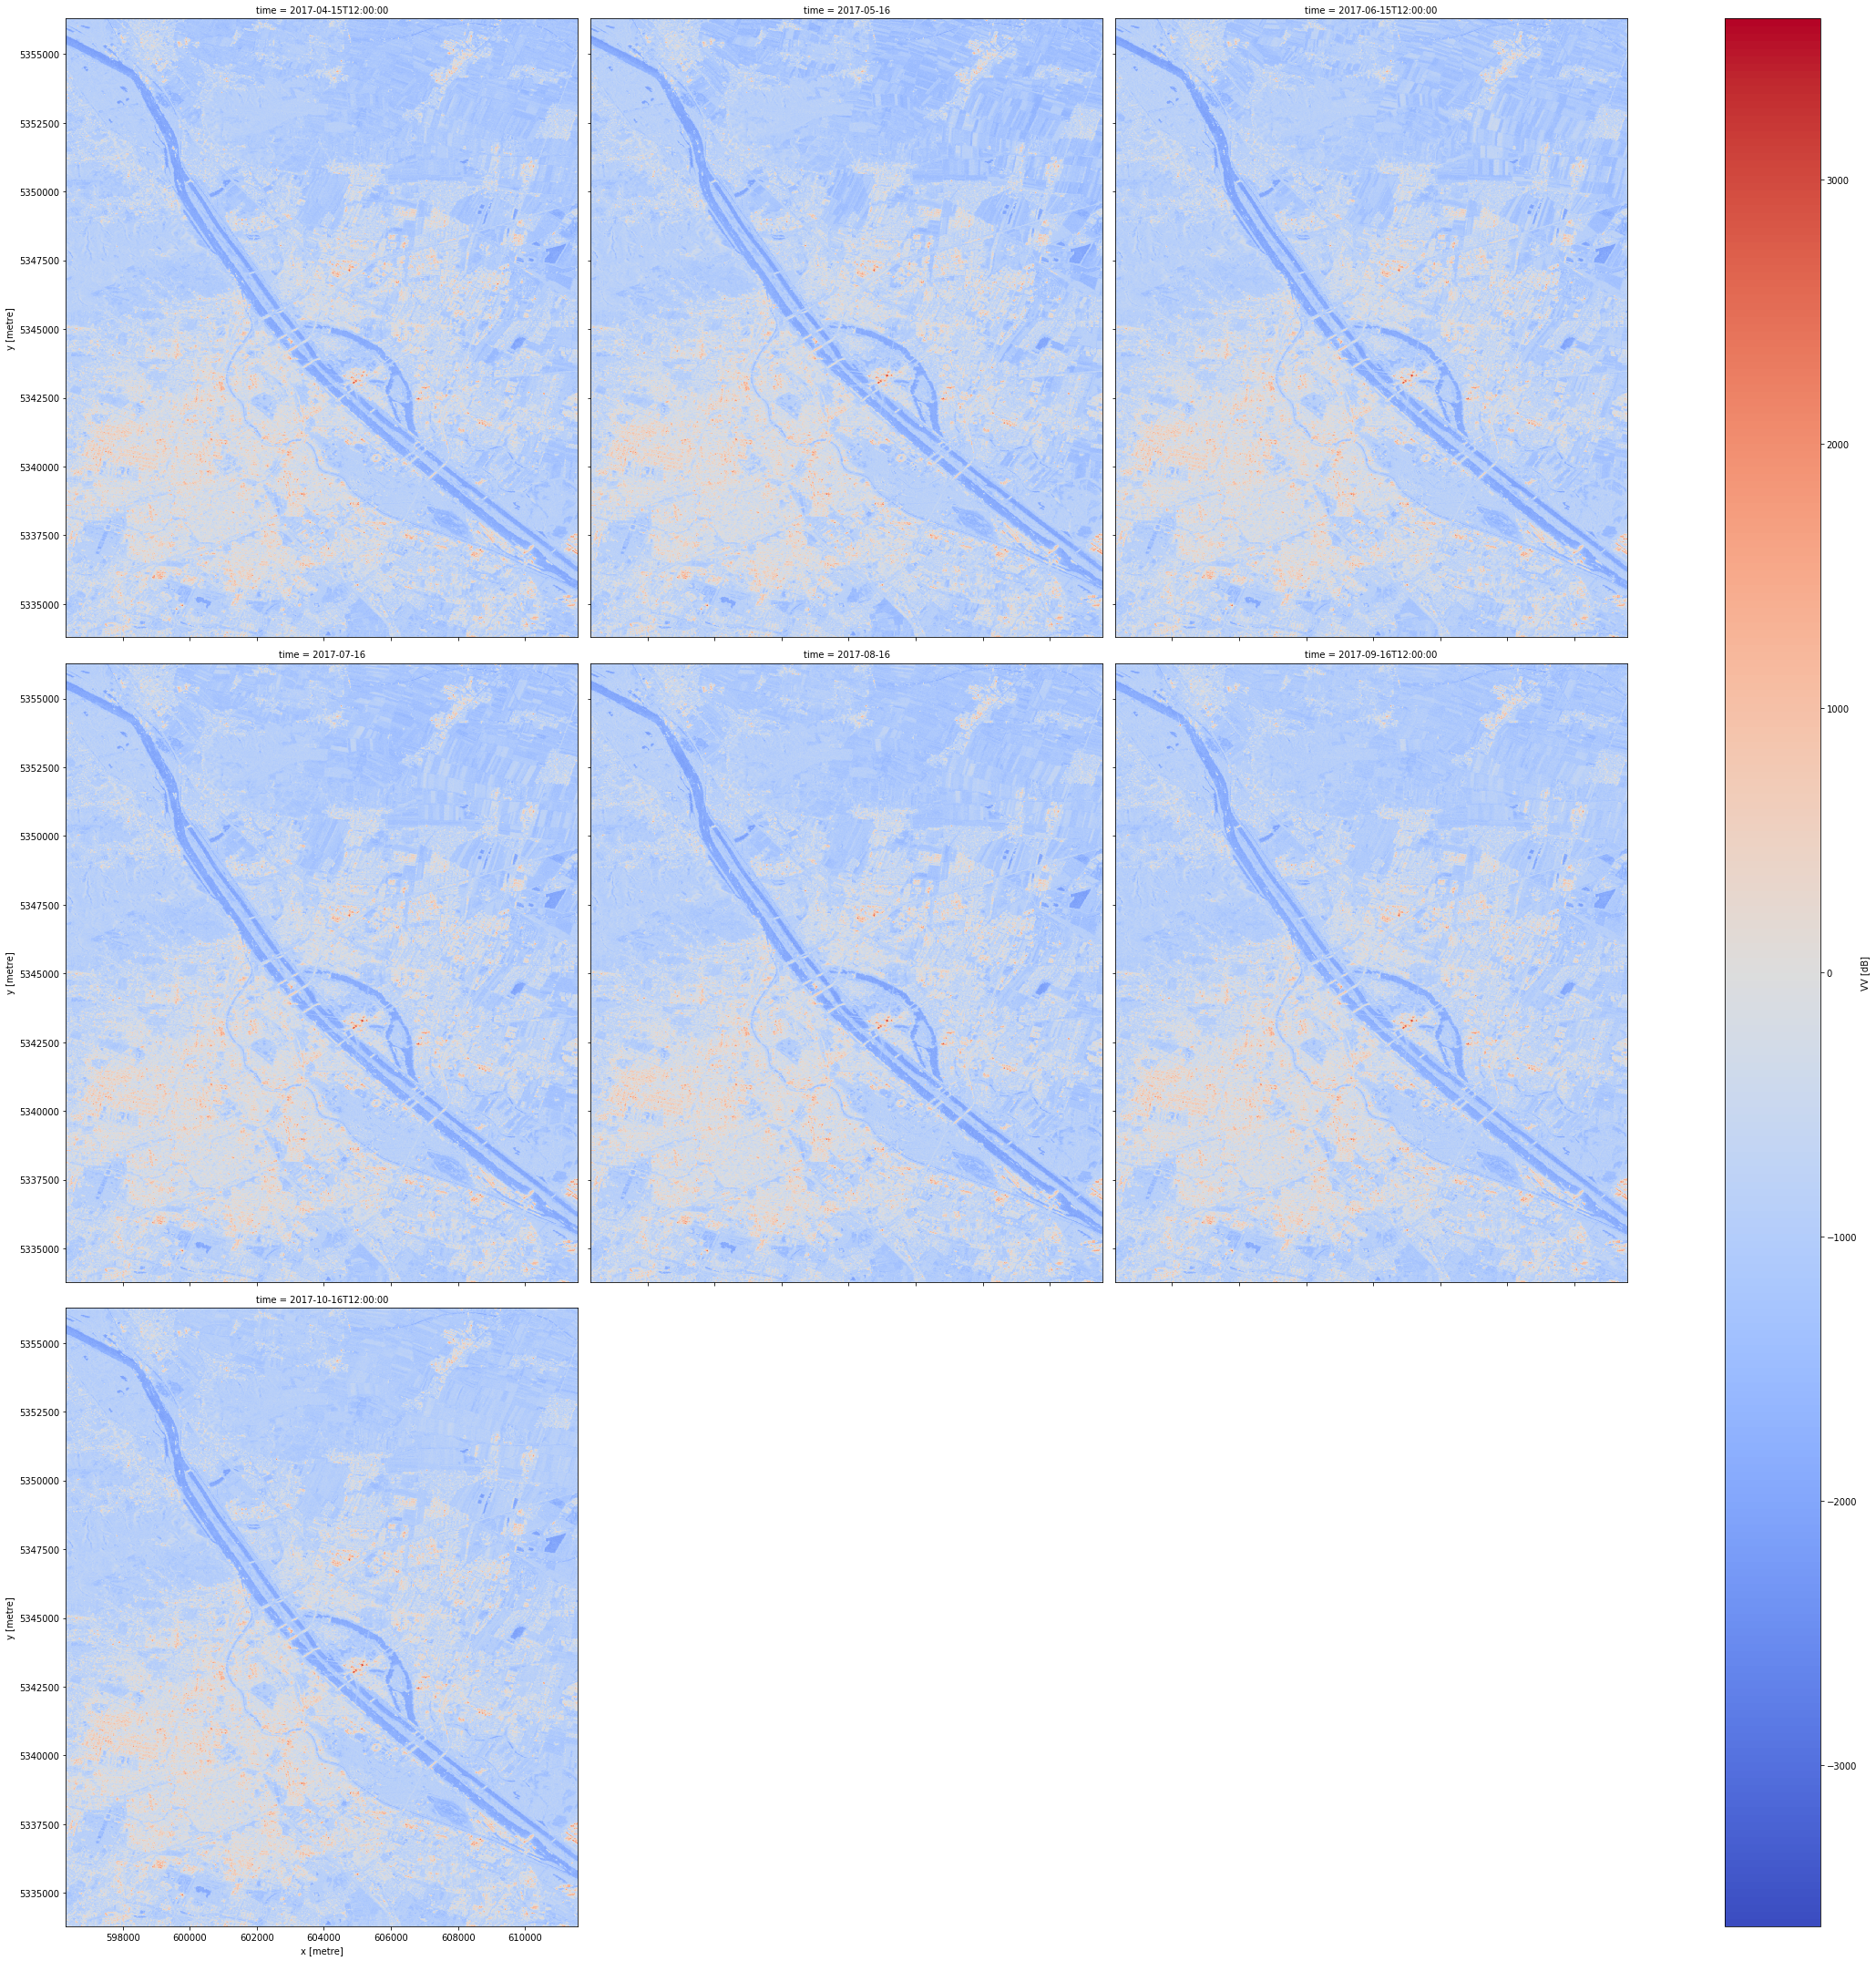

In [9]:
data_plot_vv.plot.imshow(x=data.crs.dimensions[1], 
                      y=data.crs.dimensions[0],
                      col='time',
                      size=10,
                      col_wrap=3,
                      cmap='coolwarm')

## Downloading the data

Cell below exports all the data points in GeoTIFF. The files appear on the left and it may be downloaded through the interface.

In [10]:
from datacube import helpers
filename = 'MMENSIG0'
for i in range(len(data.time)):
    date = str(data.isel(time=i).time.data)[:-19] # Without time
    filename2='{}_{}.tif'.format(filename, date)
    print('Saved: ', filename2)
    helpers.write_geotiff(filename2, data.isel(time=i))

Saved:  MMENSIG0_2017-04-15.tif
Saved:  MMENSIG0_2017-05-16.tif
Saved:  MMENSIG0_2017-06-15.tif
Saved:  MMENSIG0_2017-07-16.tif
Saved:  MMENSIG0_2017-08-16.tif
Saved:  MMENSIG0_2017-09-16.tif
Saved:  MMENSIG0_2017-10-16.tif
